# 확률 분포, 확률 변수, 확률 모형의 의미

* 분포
* 확률 분포
* 확률 변수
* 확률 모형
* 샘플링
* 모집단

## 확률 분포

자료의 **분포(distribution)**란 자료가 어떤 수치적인 값을 가지는지를 그 전반적인 특징을 서술한 것을 말한다. 

어떤 경우에 자료의 분포가 필요할까? 다음의 세 가지 경우를 생각해보자.

우선 복수의 자료 즉, 자료의 집합이 존재하고 이 집합의 특성을 서술해야 하는 경우이다. 이는 자료의 모습을 기술(describe)하기 위한 것이라고 해서 **기술 통계(descriptive statistics)**라고 한다. 보통 자료의 평균, 최대값, 최소값, 분산 등의 계산 값을 사용하거나 히스토그램(histogram)이나 커널 밀도(kernel density)를 사용하기도 한다. 

Python에서 기술 통계 방법에 대해서는 다음 노트북을 참조한다.

[[school_notebook:69b85ec9afb7415d8da4c8cd5e46d22e]]

다음으로 아직 자료가 실제로 생성(realization)되지는 않았지만 미래에 생성될 자료 집합의 특성을 미리 서술하기 위한 것이다.
만약 자료가 실험(experiment)이나 조사(survey)등을 통해 생성된다고 하면 아직 실험이나 조사를 하기 미리 특성을 알아보기 위한 경우도 있을 수 있다.

이 때의 분포를 **확률 분포(probability distribution)**이라고 한다. 이 때의 확률의 의미는 앞으로 생성될 자료의 값이 확률 분포에서 지정한 빈도에 따라 생성될 것이라는 의미이므로 **빈도주의 확률론(frequentist probability)**이라는 용어를 사용한다

마지막으로 생각할 수 있는 경우는 실제로 하나의 자료가 생성이 되었지만 그 값을 알지 못하는 미지(unknown)의 자료 값을 고려하는 경우이다. 이 때의 확률은 아직 알지 못하는 자료의 값이 특정한 값이 되리라는 믿음(belief) 또는 가능성에 대한 상대적 척도이다. 이러한 확률을 **베이지안 확률론(Bayesian probability)**이라고 한다.

우리가 어떤 문제를 푸는 경우, 보통은 몇가지 후보(candidate) 값을 놓고 각각의 후보가 정답이 될 가능성을 수치로 비교할 수 있다. 베이지안 확률론의 이러한 상황에서 정답에 대한 증거 혹은 힌트가 추가될 때 마다 이 가능성들을 어떻게 바꾸어야 하는지를 나타내는 방법론이다.

* 현존하는 복수의 자료의 기술

  * 복수의 자료가 이미 존재하는 경우, 자료 값들의 특성을 살펴보기 위해 
  * 기술 통계(descriptive statistics)
  
* 미래에 만들어질 자료의 예측

  * 자료가 아직 존재하지는 않지만 미래에 복수의 자료가 만들어질 수 있는 경우, 어떤 자료 값들이 만들어질지 예측하기 위해
  * 확률 분포 (probability distribution)
  * 빈도주의 확률론 (frequentist probability)
  
* 미지의 자료 값에 대한 추정

  * 하나의 자료가 이미 존재하지만 그 값을 아직 알지 못하는 경우, 그 자료의 값을 추정하기 위해
  * 베이지안 확률론 (Bayesian probability
  

## 확률 분포를 정의하는 방법

자료의 분포를 기술하는 방법은 앞서 말한 기술 통계가 가장 간단한 방법이지만 기술통계는 언제까지나 대략적인 모습만을 그릴 뿐이고 자료 전체의 완벽한 모습을 그리기 힘들다. 

히스토그램을 예로 들어 보자. 1,000개의 자료가 존재한다고 가정하고 이를 히스토그램으로 그려보자.

In [1]:
sp.random.seed(0)
x = sp.random.normal(size=1000)

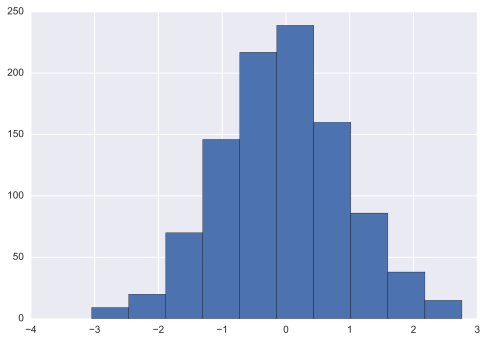

In [2]:
ns, bins, ps = plt.hist(x, bins=10)

In [3]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,10
0,-3.046143,-2.465593,-1.885043,-1.304494,-0.723944,-0.143394,0.437156,1.017706,1.598255,2.178805,2.759355
1,0.009000,0.020000,0.070000,0.146000,0.217000,0.239000,0.160000,0.086000,0.038000,0.015000,NaN


이 히스토그램에서 -0.143394	부터 0.437156 사이의 값이 전체의 약 24%를 차지하고 있음을 알 수 있다. 그럼 만약 -0.01	부터 0.01 사이의 구간에 대한 정보를 얻고 싶다면? 더 세부적인 구간에 대해 정보를 구하고 싶다면 히스토그램의 구간을 더 작게 나누어야 한다.

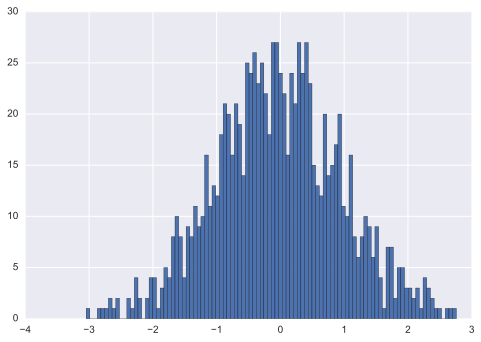

In [4]:
ns, bins, ps = plt.hist(x, bins=100)

In [5]:
pd.DataFrame([bins, ns/1000])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-3.046143,-2.988088,-2.930033,-2.871978,-2.813923,-2.755868,-2.697813,-2.639758,-2.581703,-2.523648,...,2.23686,2.294915,2.35297,2.411025,2.46908,2.527135,2.58519,2.643245,2.7013,2.759355
1,0.001000,0.000000,0.000000,0.001000,0.001000,0.001000,0.002000,0.001000,0.002000,0.000000,...,0.00400,0.003000,0.00200,0.001000,0.00100,0.000000,0.00100,0.001000,0.0010,NaN


정확한 묘사를 위해 구간의 수를 증가시키면 몇 가지 문제가 발생한다.

우선 구간의 간격이 작아지면서 하나의 구간에 있는 자료의 수가 점점 적어진다. 만약 구간 수가 무한대에 가깝다면 하나의 구간 폭은 0으로 수렴하고 해당 구간의 자료 수도 0으로 수렴할 것이다. 따라서 분포의 상대적인 모양을 살펴보기 힘들어진다. 이 문제는 누적 분포(cumulatice distribution)를 사용하면 해결할 수 있다.


두번째는 더 근본적인 문제로 서술을 위한 정보 자체가 증가하면서 정보의 단순화라는 원래의 목적을 상실한다는 점이다.

## 확률 모형

확률 분포를 보다 단순하게 묘사하기 위해 고안한 것이 **확률 모형(probability model)**이다.

확률 모형은 **분포 함수(distribution function)** 또는 **밀도 함수(density function)**라고 불리우는 미리 정해진 함수의 수식을 사용하여 분포의 모양을 정의(define)하는 방법이다. 이 때 분포의 모양을 결정하는 함수의 계수를 분포의 **모수(parameter)**라고 부른다.


예를 들어 가장 널리 쓰이는 정규 분포(Normal distribution)는 다음과 같은 수식으로 정의된다.
이 수식 자체의 이름은 $N$이고 함수의 독립 변수는 자료의 값을 의미하는 변수 $x$이다. 식에서 사용된 문자 $\mu$와 $\sigma$는 평균(mean)과 표준편차(standard deviation)이라는 이름의 모수이다.

$$ N(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\, e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

이 함수식이 실제 분포와 어떤 관계를 가지는지는 분포 함수에 대한 다음 노트북을 참조한다.

[[school_notebook:4d74d1b5651245a7903583f30ae44608]]

다음 그림은 scipy를 사용하여 평균 0, 표준편차 1인 표준 정규 분포(standard normal distribution)의 모양을 그린것이다.

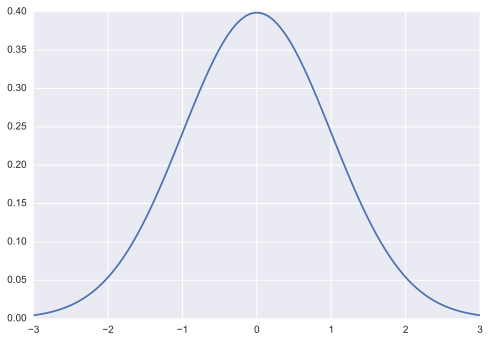

In [1]:
x = np.linspace(-3, 3, 100)
y = sp.stats.norm.pdf(x)
plt.plot(x, y)

## 확률 변수

어떤 자료의 값이 분포가 특정한 확률 모형과 일치하는 경우 그 자료를 **확률 변수(random variable)**라고 하고 해당 확률 모형을 따른다고 말한다.

확률 변수는 보통 $X$, $Y$와 같이 알파벳 대문자로 표시하며 확률 변수 $X$가 정규 분포를 따른 경우 수학적으로 다음과 같이 표기한다.

$$ X \sim N(\mu, \sigma) $$

중요한 점은 확률 모형은 사람에 의해 정의된 분포일 뿐이라는 점이다. 어떤 자료의 확률 분포가 특정한 확률 모형을 따르리라는 것은 어디까지나 여러가지 편의를 위해 그렇게 가정(assumption)한 것인 뿐인 경우가 많다.

## 샘플링

그럼 어떤 확률 변수의 값이 특정한 확률 모형을 따른다고 가정한 상태에서 실험이나 조사에 의해 하나 혹은 복수의 실제 자료 값을 구했다고 하자. 이러한 과정을 **샘플링(sampling)**이라고 하고 구해진 자료값을 **샘플(sample)**이라고 한다. 통계학에서는 확률 변수가 따르는 확률 모형와 일치하는 특성을 가지는 가상의 무한개 샘플 집합을 **모집합(population)**이라고 하기도 한다.

## 자료 분석의 과정

우리가 풀게되는 대부분의 자료 분석 문제는 다음과 같은 과정을 거친다.


* 자료를 확률 변수로 가정한다.
* 확률 변수가 특정한 확률 모형을 따른다고 가정한다.
* 샘플을 구한다.
* 샘플에 대한 정보로부터 원래 확률 모형의 종류나 모수를 추정한다.
* 구해진 확률 모형으로부터 다음에 생성될 샘플이나 샘플의 특성을 예측한다.